# Project 1 - Regression
## Forecasting the number of motor insurance claims
### This notebook uses the dateset *freMTPL2freq.csv*

(c) Nuno António 2022 - Rev. 1.0

## Dataset description

- **IDpol**: The policy ID (used to link with the claims dataset).
- **ClaimNb**: Number of claims during the exposure period.
- **Exposure**: The exposure period.
- **Area**: The area code.
- **VehPower**: The power of the car (ordered categorical).
- **VehAge**: The vehicle age, in years.
- **DrivAge**: The driver age, in years (in France, people can drive a car at 18).
- **BonusMalus**: Bonus/malus, between 50 and 350: <100 means bonus, >100 means malus in France.
- **VehBrand**: The car brand (unknown categories).
- **VehGas**: The car gas, Diesel or regular.
- **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.
- **Region**: The policy regions in France (based on a standard French classification)

For additional information on the dataset check https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3164764

## Work description

### Overview
<p>You should organize into groups of 3 to 5 students, where you will assume the role of a consultant. You are asked to develop a model to forecast how many claims will each policy holder from a car insurer in France have in the following year. The insurance company wants to use this model to improve the policies' premiums (pricing).</p>
<p>Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. Simultaneous, you should explain how your model can help the insurance company reaching its objectives.</p>

### Questions or additional informations
For any additional questions, don't hesitate to get in touch with the instructor. The instructor will also act as the insurance company/project stakeholder.

## Initializations and data loading

In [37]:
"""
Dataset description

- **IDpol**: The policy ID (used to link with the claims dataset).
- **ClaimNb**: Number of claims during the exposure period.
- **Exposure**: The exposure period.
- **Area**: The area code.
- **VehPower**: The power of the car (ordered categorical).
- **VehAge**: The vehicle age, in years.
- **DrivAge**: The driver age, in years (in France, people can drive a car at 18).
- **BonusMalus**: Bonus/malus, between 50 and 350: <100 means bonus, >100 means malus in France.
- **VehBrand**: The car brand (unknown categories).
- **VehGas**: The car gas, Diesel or regular.
- **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.
- **Region**: The policy regions in France (based on a standard French classification)

Work description
where you will assume the role of a consultant. 
You are asked to develop a model to forecast how many claims will each policy holder from a car insurer in France have in the following year.
The insurance company wants to use this model to improve the policies' premiums (pricing).
Employing the CRISP-DM process model, you are expected to define, describe and explain the model built. 
Simultaneous, you should explain how your model can help the insurance company reaching its objectives.
"""



"\nDataset description\n\n- **IDpol**: The policy ID (used to link with the claims dataset).\n- **ClaimNb**: Number of claims during the exposure period.\n- **Exposure**: The exposure period.\n- **Area**: The area code.\n- **VehPower**: The power of the car (ordered categorical).\n- **VehAge**: The vehicle age, in years.\n- **DrivAge**: The driver age, in years (in France, people can drive a car at 18).\n- **BonusMalus**: Bonus/malus, between 50 and 350: <100 means bonus, >100 means malus in France.\n- **VehBrand**: The car brand (unknown categories).\n- **VehGas**: The car gas, Diesel or regular.\n- **Density**: The density of inhabitants (number of inhabitants per km2) in the city the driver of the car lives in.\n- **Region**: The policy regions in France (based on a standard French classification)\n\nWork description\nwhere you will assume the role of a consultant. \nYou are asked to develop a model to forecast how many claims will each policy holder from a car insurer in France hav

In [1]:
# Loading packages
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as  sns
import category_encoders as ce
from sklearn import preprocessing

In [2]:
# Loading the dataset and visualizing summary statistics
ds = pd.read_csv("freMTPL2freq.csv", sep=";")
ds.describe(include='all').T

C:\Users\BCV\AppData\Local\Temp\ipykernel_9804\3374236374.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv("freMTPL2freq.csv", sep=";")


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
IDpol,678013,678013,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ClaimNb,678013.0,NaN,NaN,NaN,0.053247,0.240117,0.0,0.0,0.0,0.0,16.0
Exposure,678013.0,NaN,NaN,NaN,0.52875,0.364442,0.002732,0.18,0.49,0.99,2.01
VehPower,678013.0,NaN,NaN,NaN,6.454631,2.050906,4.0,5.0,6.0,7.0,15.0
VehAge,678013.0,NaN,NaN,NaN,7.044265,5.666232,0.0,2.0,6.0,11.0,100.0
DrivAge,678013.0,NaN,NaN,NaN,45.499122,14.137444,18.0,34.0,44.0,55.0,100.0
BonusMalus,678013.0,NaN,NaN,NaN,59.761502,15.636658,50.0,50.0,50.0,64.0,230.0
Density,678013.0,NaN,NaN,NaN,1792.422405,3958.646564,1.0,92.0,393.0,1658.0,27000.0
Region,678013,22,R24,160601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,678013,6,C,191880,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Show top rows
ds.head()

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Region,Area,VehBrand,VehGas
0,1,1,0.10,5,0,55,50,1217,R82,D,B12,Regular
1,3,1,0.77,5,0,55,50,1217,R82,D,B12,Regular
2,5,1,0.75,6,2,52,50,54,R22,B,B12,Diesel
3,10,1,0.09,7,0,46,50,76,R72,B,B12,Diesel
4,11,1,0.84,7,0,46,50,76,R72,B,B12,Diesel


In [4]:
# Confirm that there are not any missing values
print(ds.isnull().sum())

IDpol         0
ClaimNb       0
Exposure      0
VehPower      0
VehAge        0
DrivAge       0
BonusMalus    0
Density       0
Region        0
Area          0
VehBrand      0
VehGas        0
dtype: int64


In [5]:
#Data Understanding and Preparation
# Transform a list of columns to categorical
# Ckeck the top counts of all categorical variables
# Visual exploration of the cross table bar plots

# the categorical columns  form da dataset are  Area, VehPower, VehBrand, VehGas, Region, BonusMalusGroup
# the numerical columns  form da dataset are  ClaimNb, Exposure, VehAge, DrivAge, Density

# Transform a list of columns to categorical
def to_categorical(df, cols):
    for col in cols:
        df[col] = df[col].astype('category')
    return df

ds = to_categorical(ds, ['Area', 'VehBrand','VehPower', 'VehGas', 'Region'])
ds.describe(include='all').T
ds.dtypes

# Ckeck the top counts of all categorical variables
for col in ds.select_dtypes(include=['category']).columns:
    print(col)
    print(ds[col].value_counts())
    print('')



VehPower
6     148976
7     145401
5     124821
4     115349
8      46956
10     31354
9      30085
11     18352
12      8214
13      3229
15      2926
14      2350
Name: VehPower, dtype: int64

Region
R24    160601
R82     84752
R93     79315
R11     69791
R53     42122
R52     38751
R91     35805
R72     31329
R31     27285
R54     19046
R73     17141
R41     12990
R25     10893
R26     10492
R23      8784
R22      7994
R83      5287
R74      4567
R94      4516
R21      3026
R42      2200
R43      1326
Name: Region, dtype: int64

Area
C    191880
D    151596
E    137167
A    103957
B     75459
F     17954
Name: Area, dtype: int64

VehBrand
B12    166024
B1     162736
B2     159861
B3      53395
B5      34753
B6      28548
B4      25179
B10     17707
B11     13585
B13     12178
B14      4047
Name: VehBrand, dtype: int64

VehGas
Regular    345877
Diesel     332136
Name: VehGas, dtype: int64



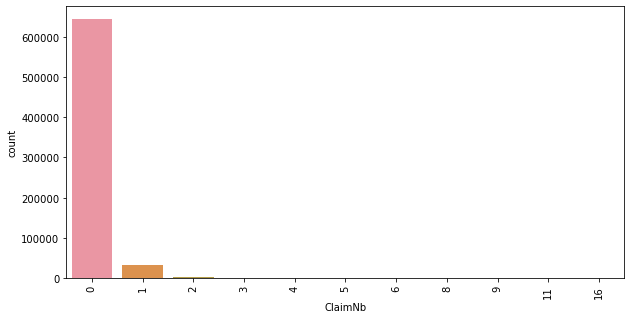

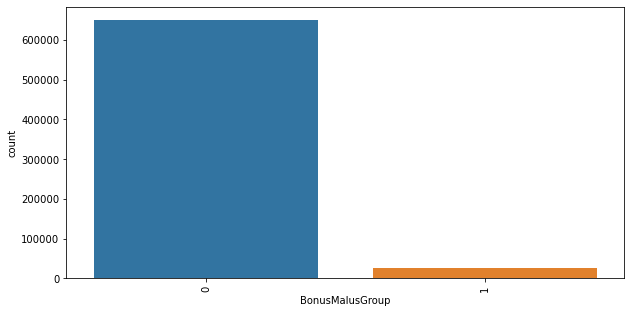

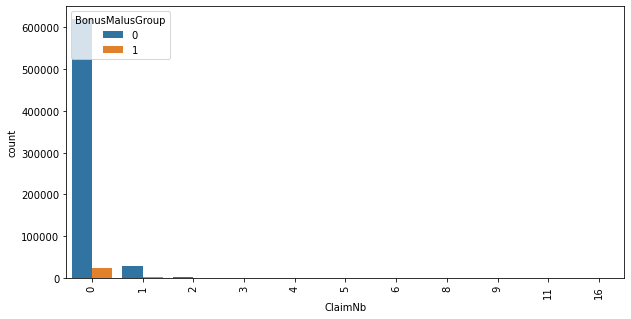

In [6]:
def plot_cross_table_bar(df, x, y, hue=None, figsize=(10, 5)):
    plt.figure(figsize=figsize)
    sns.countplot(x=x, hue=hue, data=df)
    plt.xticks(rotation=90)
    plt.show()
    plt.figure(figsize=figsize)
    sns.countplot(x=y, hue=hue, data=df)
    plt.xticks(rotation=90)
    plt.show()
    plt.figure(figsize=figsize)
    sns.countplot(x=x, hue=y, data=df)
    plt.xticks(rotation=90)
    plt.show()
# BonusMalus: <100 are  bonus, >100  are malus
# create a new column BonusMalusGroup to group the BonusMalus values bonus=0, malus=1
ds['BonusMalusGroup'] = np.where(ds['BonusMalus'] < 100, 0, 1)
ds['BonusMalusGroup'].value_counts()

# Visual exploration of the cross table bar plots
plot_cross_table_bar(ds, 'ClaimNb', 'BonusMalusGroup')



In [7]:
# DrivAge max and min values
print(ds['DrivAge'].max())
print(ds['DrivAge'].min())

100
18


In [8]:
# Visual exploration of the cross table bar plots
ds['DrivAge'].describe()

##create new colum to group DrivAge bins interval based on distribution/quartiles, min 18, 25% = 34, 50% = 44 , 75% = 55, max 100
ds['DrivAgeGroup'] = pd.cut(ds['DrivAge'], bins=[18, 34, 44, 55, 100], labels=['18-34', '35-44', '45-55', '56-100'])
ds['DrivAgeGroup'].value_counts()





45-55     178606
35-44     170578
18-34     170397
56-100    157684
Name: DrivAgeGroup, dtype: int64

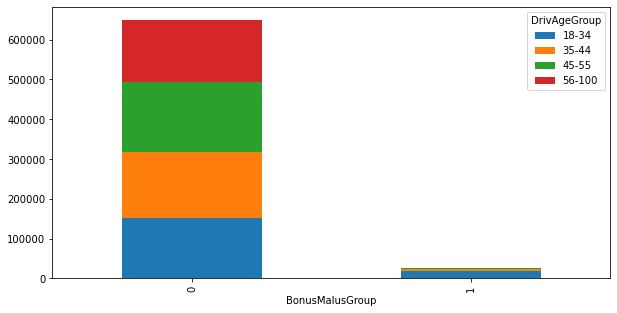

In [9]:
table1=pd.crosstab(index=ds['BonusMalusGroup'],columns=ds['DrivAgeGroup'])
table1.plot(kind="bar",figsize=(10,5),stacked=True)
plt.show()


VehPower
6     148976
7     145401
5     124821
4     115349
8      46956
10     31354
9      30085
11     18352
12      8214
13      3229
15      2926
14      2350
Name: VehPower, dtype: int64

Region
R24    160601
R82     84752
R93     79315
R11     69791
R53     42122
R52     38751
R91     35805
R72     31329
R31     27285
R54     19046
R73     17141
R41     12990
R25     10893
R26     10492
R23      8784
R22      7994
R83      5287
R74      4567
R94      4516
R21      3026
R42      2200
R43      1326
Name: Region, dtype: int64

Area
C    191880
D    151596
E    137167
A    103957
B     75459
F     17954
Name: Area, dtype: int64

VehBrand
B12    166024
B1     162736
B2     159861
B3      53395
B5      34753
B6      28548
B4      25179
B10     17707
B11     13585
B13     12178
B14      4047
Name: VehBrand, dtype: int64

VehGas
Regular    345877
Diesel     332136
Name: VehGas, dtype: int64

BonusMalusGroup
0    650689
1     27324
Name: BonusMalusGroup, dtype: int64

DrivAgeGroup
45-55

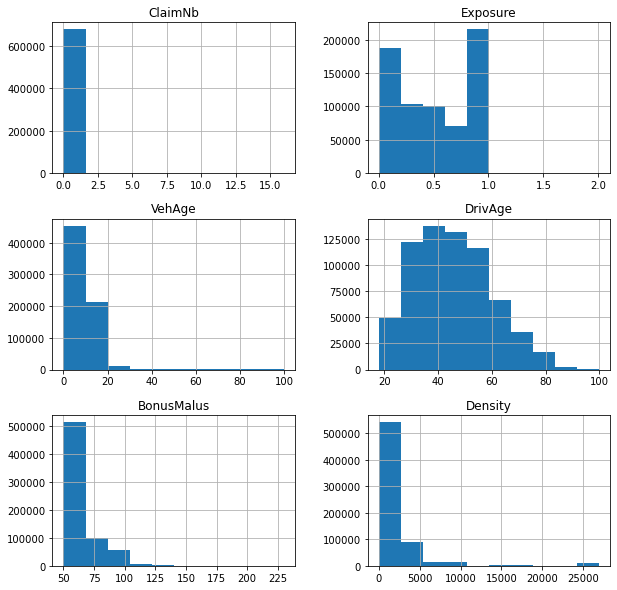

In [10]:
# Do histograms select just  numeric variables
ds = to_categorical(ds, ['Area', 'VehBrand', 'VehGas', 'Region', 'BonusMalusGroup', 'DrivAgeGroup'])
ds.describe(include='all').T
ds.dtypes

# Ckeck the top counts of all categorical variables
for col in ds.select_dtypes(include=['category']).columns:
    print(col)
    print(ds[col].value_counts())
    print('')

numerical=ds.select_dtypes(include=[np.number]).columns.tolist()

ds[numerical].hist(figsize=(10,10))
plt.show()


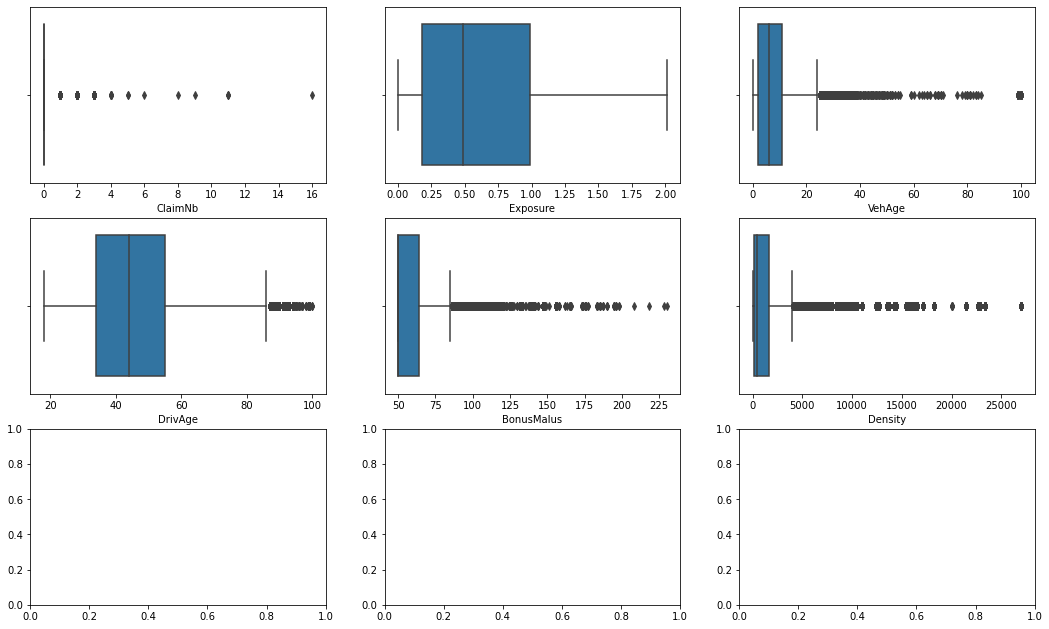

In [11]:
# Do one boxplots for each numeric variables to check for outliers
fig, ax = plt.subplots(3, 3,  figsize=(18, 11))
for var, subplot in zip(ds[numerical], ax.flatten()):
    sns.boxplot(x=ds[var], ax=subplot)

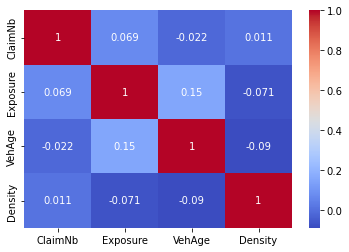

In [27]:
#Does the boxplots show any interesting patterns?
corr = ds[['ClaimNb', 'Exposure', 'VehAge', 'DrivAgeGroup', 'BonusMalusGroup', 'Density']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()




C:\Users\BCV\AppData\Local\Temp\ipykernel_10844\1966126827.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


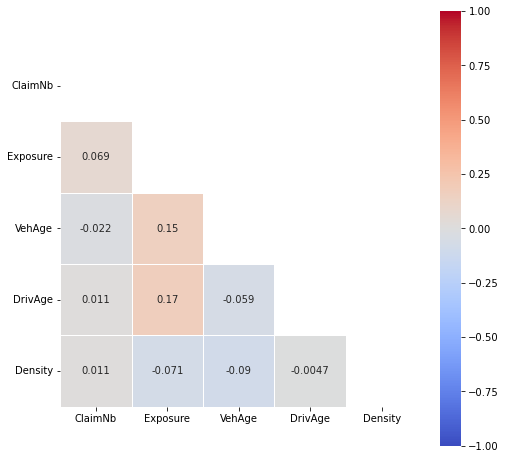

In [30]:
corr = ds[numerical].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(8, 8))
heatmap = sns.heatmap(corr,
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      vmin = -1,
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 10})

#add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns, rotation = 0)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})


In [ ]:
# Pair plot some of the numerical variables with BonusMalus
#cols=['ClaimNb','Exposure','VehAge','DrivAge','BonusMalus','Density']
#g = sns.pairplot(ds[cols], hue="BonusMalus")

DATA PREPARATION

In [31]:
# Data Preparation
# Create a modeling dataset from the original dataset

ds_modeling = ds.copy(deep=True) # deep=True to create a copy of the data and the indices
ds_modeling.head(20)

#find the columns with outliers
ds_modeling[numerical].describe()

,ClaimNb,Exposure,VehAge,DrivAge,Density
count,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,0.053247,0.528750,7.044265,45.499122,1792.422405
std,0.240117,0.364442,5.666232,14.137444,3958.646564
min,0.000000,0.002732,0.000000,18.000000,1.000000
25%,0.000000,0.180000,2.000000,34.000000,92.000000
50%,0.000000,0.490000,6.000000,44.000000,393.000000
75%,0.000000,0.990000,11.000000,55.000000,1658.000000
max,16.000000,2.010000,100.000000,100.000000,27000.000000


In [32]:
# For demo purposes, let's assume high bmi and charges values are outliers
# so let's add principle component analysis to remove the outliers

ds_modeling = ds_modeling[(ds_modeling['ClaimNb'] < 4) & (ds_modeling['VehAge'] < 80) & (ds_modeling['DrivAge'] < 85) & (ds_modeling['Density'] < 25000)]
ds_modeling.head(10)
#ds_modeling.shape3

,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Region,Area,VehBrand,VehGas,BonusMalusGroup,DrivAgeGroup
0,1,1,0.10,5,0,55,50,1217,R82,D,B12,Regular,0,45-55
1,3,1,0.77,5,0,55,50,1217,R82,D,B12,Regular,0,45-55
2,5,1,0.75,6,2,52,50,54,R22,B,B12,Diesel,0,45-55
3,10,1,0.09,7,0,46,50,76,R72,B,B12,Diesel,0,45-55
4,11,1,0.84,7,0,46,50,76,R72,B,B12,Diesel,0,45-55
5,13,1,0.52,6,2,38,50,3003,R31,E,B12,Regular,0,35-44
6,15,1,0.45,6,2,38,50,3003,R31,E,B12,Regular,0,35-44
7,17,1,0.27,7,0,33,68,137,R91,C,B12,Diesel,0,18-34
8,18,1,0.71,7,0,33,68,137,R91,C,B12,Diesel,0,18-34
9,21,1,0.15,7,0,41,50,60,R52,B,B12,Diesel,0,35-44


In [33]:
# compare the original dataset with the modeling dataset
#original dataset
ds[numerical].describe()


,ClaimNb,Exposure,VehAge,DrivAge,Density
count,678013.000000,678013.000000,678013.000000,678013.000000,678013.000000
mean,0.053247,0.528750,7.044265,45.499122,1792.422405
std,0.240117,0.364442,5.666232,14.137444,3958.646564
min,0.000000,0.002732,0.000000,18.000000,1.000000
25%,0.000000,0.180000,2.000000,34.000000,92.000000
50%,0.000000,0.490000,6.000000,44.000000,393.000000
75%,0.000000,0.990000,11.000000,55.000000,1658.000000
max,16.000000,2.010000,100.000000,100.000000,27000.000000


In [34]:
#modeling dataset
ds_modeling[numerical].describe()

,ClaimNb,Exposure,VehAge,DrivAge,Density
count,665493.000000,665493.000000,665493.000000,665493.000000,665493.000000
mean,0.052788,0.528992,7.066997,45.341448,1396.309522
std,0.236434,0.364615,5.598679,13.963567,2399.404004
min,0.000000,0.002732,0.000000,18.000000,1.000000
25%,0.000000,0.170000,2.000000,34.000000,91.000000
50%,0.000000,0.490000,6.000000,44.000000,376.000000
75%,0.000000,1.000000,11.000000,55.000000,1516.000000
max,3.000000,2.010000,79.000000,84.000000,23396.000000


In [35]:
#original dataset
ds.shape


(678013, 14)

In [36]:
#modeling dataset
ds_modeling.shape

(665493, 14)

In [37]:
#Groupby DrivAgeGroup with mean ClaimNb of other columns to see the distribution of the data
ds_modeling.groupby('DrivAgeGroup')['ClaimNb'].agg(mean_claimnb='mean')



,mean_claimnb
DrivAgeGroup,
18-34,0.050848
35-44,0.047415
45-55,0.056769
56-100,0.056087


In [38]:
# Encode categorical values into dummy variables, onehotencoder is  a class that has a method called fit_transform that will transform the data into dummy variables, ce is a library that has the onehotencoder class
#use_cat_names = True to use the categorical variable names as prefix 
onehotencoder = ce.OneHotEncoder(cols=['Area', 'VehBrand', 'VehGas', 'Region', 'BonusMalusGroup', 'DrivAgeGroup'],  use_cat_names=True)
ds_modeling_ce_one_hot = onehotencoder.fit_transform(ds_modeling)
ds_modeling_ce_one_hot.head(10)


,IDpol,ClaimNb,Exposure,VehPower,VehAge,DrivAge,BonusMalus,Density,Region_R82,Region_R22,...,VehBrand_B11,VehGas_Regular,VehGas_Diesel,BonusMalusGroup_0.0,BonusMalusGroup_1.0,DrivAgeGroup_18-34,DrivAgeGroup_35-44,DrivAgeGroup_45-55,DrivAgeGroup_56-100,DrivAgeGroup_nan
0,1,1,0.10,5,0,55,50,1217,1,0,...,0,1,0,1,0,0,0,1,0,0
1,3,1,0.77,5,0,55,50,1217,1,0,...,0,1,0,1,0,0,0,1,0,0
2,5,1,0.75,6,2,52,50,54,0,1,...,0,0,1,1,0,0,0,1,0,0
3,10,1,0.09,7,0,46,50,76,0,0,...,0,0,1,1,0,0,0,1,0,0
4,11,1,0.84,7,0,46,50,76,0,0,...,0,0,1,1,0,0,0,1,0,0
5,13,1,0.52,6,2,38,50,3003,0,0,...,0,1,0,1,0,0,1,0,0,0
6,15,1,0.45,6,2,38,50,3003,0,0,...,0,1,0,1,0,0,1,0,0,0
7,17,1,0.27,7,0,33,68,137,0,0,...,0,0,1,1,0,1,0,0,0,0
8,18,1,0.71,7,0,33,68,137,0,0,...,0,0,1,1,0,1,0,0,0,0
9,21,1,0.15,7,0,41,50,60,0,0,...,0,0,1,1,0,0,1,0,0,0


In [39]:
ds_modeling_ce_one_hot.shape

(665493, 56)

In [40]:
# Find and remove outliers

# Function to find outliers on columns based on percentile
def removeOutliers(df, colList, lowPercentile=0.05, highPercentile=0.95, verbose=False):
    quant_df = df[colList].quantile([lowPercentile, highPercentile])
    if verbose:
        print(quant_df)
    for name in list(df[colList].columns):
        df = df[(df[name] >= quant_df.loc[lowPercentile, name]) & (df[name] <= quant_df.loc[highPercentile, name])]
    return df

# Find and remove outliers
cols = ['ClaimNb', 'VehAge','Density','DrivAge']
ds_modeling_ce_one_hot = removeOutliers(ds_modeling_ce_one_hot, colList=cols , lowPercentile=0.01, highPercentile=0.99, verbose=True)

      ClaimNb  VehAge  Density  DrivAge
0.01      0.0     0.0     10.0     20.0
0.99      1.0    21.0  10156.0     79.0


In [41]:
ds_modeling_ce_one_hot.shape

(637101, 56)

In [42]:
# Create the target
y = ds_modeling_ce_one_hot['ClaimNb']

In [43]:
# Drop not used columns
cols = ['Exposure', 'IDpol']
ds_modeling_ce_one_hot = ds_modeling_ce_one_hot.drop(columns=cols)

In [44]:
# Normalize all columns
# MinMax scaler returns an array, so the dataframe must be recreated
ds_modeling_ce_one_hot = pd.DataFrame(preprocessing.MinMaxScaler().fit_transform(ds_modeling_ce_one_hot.values), columns=ds_modeling_ce_one_hot.columns,index=ds_modeling_ce_one_hot.index)

Regression 

In [45]:
!pip3 install scikit-learn numpy

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
# Split the dataset intro train and test
ds_modeling_ce_one_hot_train, ds_modeling_ce_one_hot_test, y_train, y_test = train_test_split(ds_modeling_ce_one_hot, y, train_size = 0.75, test_size = 0.25, random_state = 2021)

Importing packages

In [ ]:
#import sklearn
#from sklearn import linear_model

In [49]:
lr_regr = linear_model.LinearRegression()

NameError: name 'linear_model' is not defined

In [ ]:
#from sklearn.feature_selection import RFECV

In [ ]:
# Features to include (all in this case)
#ds_modeling_ce_one_hot.columns[vis.support_]

In [ ]:
#import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [ ]:
# Create and train the model
lr_regr.fit(X_train, y_train)

In [ ]:
# Print the Intercept
print('Intercept:',lr_regr.intercept_, '\n')

# Print Coefficients by descending "importance"
formattedList = [format(float(i),'.6f') for i in lr_regr.coef_]
formattedList2 = [format(abs(float(i)),'.6f') for i in lr_regr.coef_]
data_tuples = list(zip(X.columns,formattedList,formattedList2))
coeff_df = pd.DataFrame(data=data_tuples, columns=['Feature','Coefficient','AbsCoefficient'])
coeff_df['AbsCoefficient']=coeff_df['AbsCoefficient'].astype(float)
coeff_df.sort_values('AbsCoefficient', axis=0, inplace=True, ascending=False)
coeff_df

EVALUATION

In [ ]:
# predict y for X_train and X_test
y_pred_train = lr_regr.predict(X_train) 
y_pred_test = lr_regr.predict(X_test) 





In [ ]:
# Function to create dataframe with metrics
def performanceMetricsDF(metricsObj, yTrain, yPredTrain, yTest, yPredTest):
  measures_list = ['MAE','RMSE', 'R^2','MAPE (%)','MAX Error']
  train_results = [metricsObj.mean_absolute_error(yTrain, yPredTrain),
                np.sqrt(metricsObj.mean_squared_error(yTrain, yPredTrain)),
                metricsObj.r2_score(yTrain, yPredTrain),
                metricsObj.mean_absolute_percentage_error(yTrain, yPredTrain),
                metricsObj.max_error(yTrain, yPredTrain)]
  test_results = [metricsObj.mean_absolute_error(yTest, yPredTest),
                np.sqrt(metricsObj.mean_squared_error(yTest, yPredTest)),
                metricsObj.r2_score(yTest, yPredTest),
                  metricsObj.mean_absolute_percentage_error(yTest, yPredTest),
                metricsObj.max_error(yTest, yPredTest)]
  resultsDF = pd.DataFrame({'Measure': measures_list, 'Train': train_results, 'Test':test_results})
  return(resultsDF)

In [ ]:
# Show performance results
resultsDF = performanceMetricsDF(metrics, y_train, y_pred_train, y_test, y_pred_test)
resultsDF


In [ ]:

# Visualize the residuals
residuals_vis = ResidualsPlot(lr_regr)
residuals_vis.fit(X_train, y_train)  # Fit the training data to the visualizer
residuals_vis.score(X_test, y_test)  # Evaluate the model on the test data
residuals_vis.show() 
